In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


### Load data and prepare train n test sets

In [6]:
DATA_PATH = "dataset/"
FEATURE = "CTD"

train_neg = pd.read_csv(DATA_PATH + FEATURE + "_TR_neg_SPIDER.csv")
train_pos = pd.read_csv(DATA_PATH + FEATURE + "_TR_pos_SPIDER.csv")
test_neg = pd.read_csv(DATA_PATH + FEATURE + "_TS_neg_SPIDER.csv")
test_pos = pd.read_csv(DATA_PATH + FEATURE + "_TS_pos_SPIDER.csv")

In [7]:
train_frames = [train_neg, train_pos]
test_frames = [test_neg, test_pos]

In [8]:
train_df= pd.concat(train_frames)
test_df = pd.concat(test_frames)

In [9]:
print(train_df.shape)
print(test_df.shape)

(2542, 149)
(461, 149)


### Feature engineering

In [10]:
# Check for null values

# print(train_df.isnull().sum())
# print(test_df.isnull().sum())

In [11]:
train_set = train_df.drop(['seq_name'] , axis=1)
test_set = test_df.drop(['seq_name'] , axis=1)
print(train_set.shape)
print(test_set.shape)

(2542, 148)
(461, 148)


In [12]:
# Check for duplicates

# print(train_set.duplicated().sum())
# print(test_set.duplicated().sum())

In [13]:
y_train = train_set.druggable
y_test = test_set.druggable
X_train = train_set.drop(['druggable'] , axis=1)
X_test = test_set.drop(['druggable'] , axis=1)

In [14]:
# Normalize data

from sklearn.preprocessing import StandardScaler

ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

ModuleNotFoundError: No module named 'sklearn'

### Models

In [ ]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [ ]:
# Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

accuracy, sensitivity, specificity, precision, f1_measure = {}, {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(y_test, predictions)
    sensitivity[key] = recall_score(y_test, predictions)
    specificity[key] = recall_score(y_test, predictions, pos_label=0)
    precision[key] = precision_score(y_test, predictions)
    f1_measure[key] = f1_score(y_test, predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1-Score'])
df_model['Accuracy'] = accuracy.values()
df_model['Sensitivity'] = sensitivity.values()
df_model['Specificity'] = specificity.values()
df_model['Precision'] = precision.values()
df_model['F1-Score'] = f1_measure.values()

df_model

,Accuracy,Sensitivity,Specificity,Precision,F1-Score
Logistic Regression,0.757050,0.736607,0.776371,0.756881,0.746606
Support Vector Machines,0.754881,0.741071,0.767932,0.751131,0.746067
Decision Trees,0.678959,0.593750,0.759494,0.700000,0.642512
Random Forest,0.696312,0.549107,0.835443,0.759259,0.637306
Naive Bayes,0.570499,0.218750,0.902954,0.680556,0.331081
K-Nearest Neighbor,0.737527,0.825893,0.654008,0.692884,0.753564


<ipython-input-27-f8946d5f4198>:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


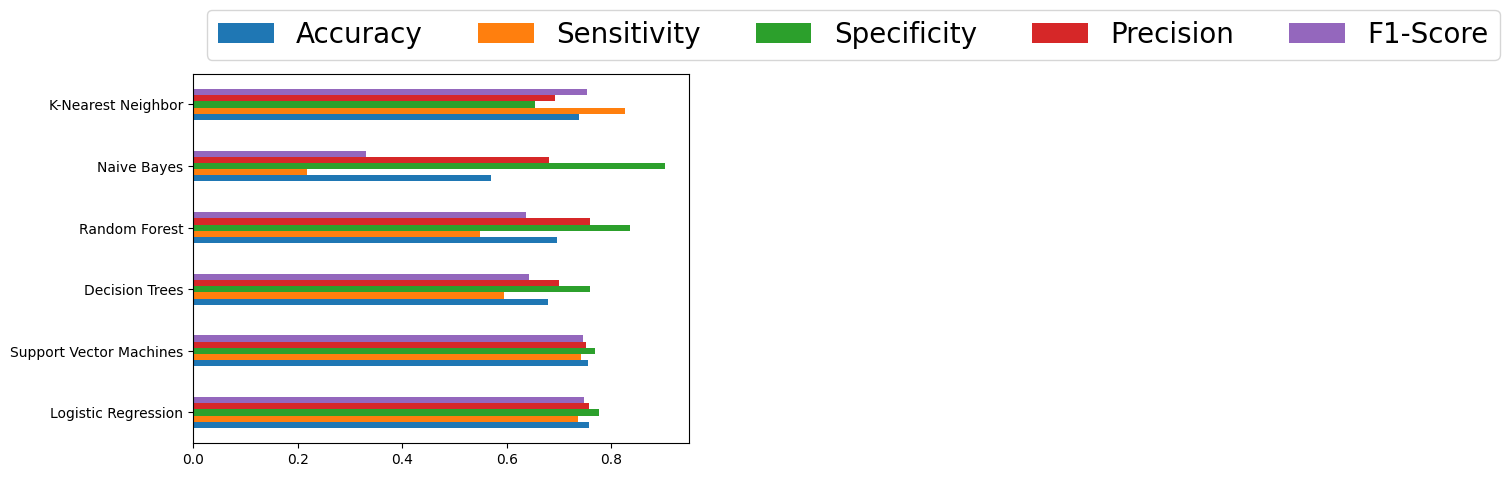

In [ ]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 20}
)
plt.tight_layout()